## Setup

In [1]:
import keras
print(keras.__version__)


2.15.0


In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, Conv1D, Conv2D, Flatten, Reshape, MaxPooling1D, MaxPooling2D, AveragePooling2D, BatchNormalization, Permute, ReLU, Softmax
from keras.optimizers.legacy import Adam
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time


### Load Dataset

In [2]:


# Load the CSV file into a pandas DataFrame
df = pd.read_csv('data.csv')

# Now you can work with the data, for example, print the first few rows
print(df.head())
print(type(df))

   count    channel_1   channel_2   channel_3   channel_4  acc_x  acc_y  \
0  101.0 -1009.670141 -393.942362 -930.014012 -308.921346    0.0    0.0   
1  101.0  -999.179721 -378.260961 -911.722161 -313.925332    0.0    0.0   
2  102.0  -985.618844 -377.640138 -923.992773 -321.749203    0.0    0.0   
3  102.0  -997.747340 -395.423362 -938.873835 -323.286302    0.0    0.0   
4  103.0  -999.497613 -407.675274 -941.001838 -320.163485    0.0    0.0   

   acc_z  resistance_1  resistance_2  resistance_3  resistance_4  \
0    0.0           0.0           0.0           0.0           0.0   
1    0.0           0.0           0.0           0.0           0.0   
2    0.0           0.0           0.0           0.0           0.0   
3    0.0           0.0           0.0           0.0           0.0   
4    0.0           0.0           0.0           0.0           0.0   

   resistance_5     timestamp  marker       class  
0           0.0  1.704024e+09     0.0  eyes_blink  
1           0.0  1.704024e+09     0.

### remove unwanted columns

In [3]:
# df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# Specify the columns you want to remove
columns_to_remove = ['count', 'acc_x','acc_y', 'acc_z', 'resistance_1', 'resistance_2', 'resistance_3', 'resistance_4', 'resistance_5', 'timestamp', 'marker']

# Removing specified columns
df = df.drop(columns_to_remove, axis=1)

print("\nDataFrame after removing specified columns:")
print(df)

Original DataFrame:
        count    channel_1   channel_2   channel_3   channel_4  acc_x  acc_y  \
0       101.0 -1009.670141 -393.942362 -930.014012 -308.921346    0.0    0.0   
1       101.0  -999.179721 -378.260961 -911.722161 -313.925332    0.0    0.0   
2       102.0  -985.618844 -377.640138 -923.992773 -321.749203    0.0    0.0   
3       102.0  -997.747340 -395.423362 -938.873835 -323.286302    0.0    0.0   
4       103.0  -999.497613 -407.675274 -941.001838 -320.163485    0.0    0.0   
...       ...          ...         ...         ...         ...    ...    ...   
427046  163.0  -698.319730   92.964563   -5.252689  -57.966579    0.0    0.0   
427047  164.0  -735.782307   -2.036376  -62.196406 -125.920562    0.0    0.0   
427048  164.0  -759.089364  -58.763178  -92.340000 -159.751697    0.0    0.0   
427049  165.0  -717.879406   36.473374  -33.522593  -90.739323    0.0    0.0   
427050  165.0  -699.123808   93.458230   -7.044102  -55.195313    0.0    0.0   

        acc_z  resi

## EDA

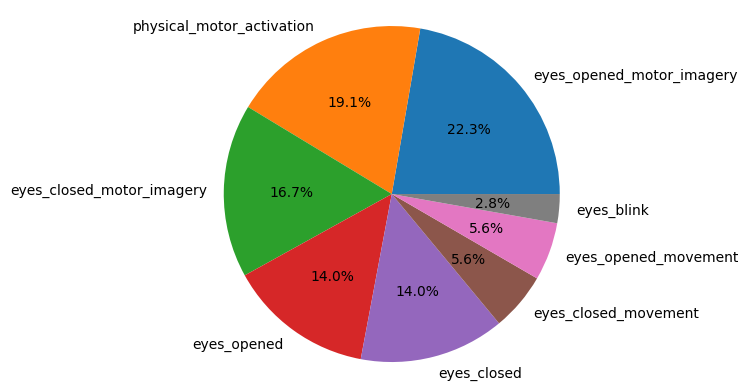

In [4]:
# Assuming you have a dataframe named df with a column named 'Class'
# Count the number of classes
class_counts = df['class'].value_counts()

# Create pie chart
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### get only required classes

In [5]:

# import pandas as pd

# Assuming you have a dataframe `df` and you want to drop rows where `class` column has value `specific_value`

df = df[df['class'] != 'eyes_blink']
df = df[df['class'] != 'eyes_opened_movement']
df = df[df['class'] != 'eyes_closed_movement']
# df = df[df['class'] != 'eyes_closed']
df = df[df['class'] != 'eyes_closed_motor_imagery']
df = df[df['class'] != 'physical_motor_activation']
print(df.head)


<bound method NDFrame.head of          channel_1   channel_2   channel_3   channel_4  \
11894  -634.363700  216.115729 -485.345517   50.299784   
11895  -629.980538  203.171935 -493.947287   60.255398   
11896  -607.234466  215.906294 -482.196521   70.368088   
11897  -627.074635  231.591435 -475.846171   57.442993   
11898  -635.885840  208.879022 -495.267471   46.410289   
...            ...         ...         ...         ...   
321821 -481.321384  287.740423  114.003370  146.882701   
321822 -539.431950  161.832951   28.823409   46.324271   
321823 -527.266055  197.833228   61.652251   82.979030   
321824 -455.856406  332.899715  154.599984  194.682362   
321825 -489.272412  287.639445  115.820962  154.138107   

                            class  
11894                 eyes_closed  
11895                 eyes_closed  
11896                 eyes_closed  
11897                 eyes_closed  
11898                 eyes_closed  
...                           ...  
321821  eyes_opened_m

In [6]:
df.loc[df['class'] == 'eyes_opened', 'class'] = 'eyes_static'
df.loc[df['class'] == 'eyes_closed', 'class'] = 'eyes_static'

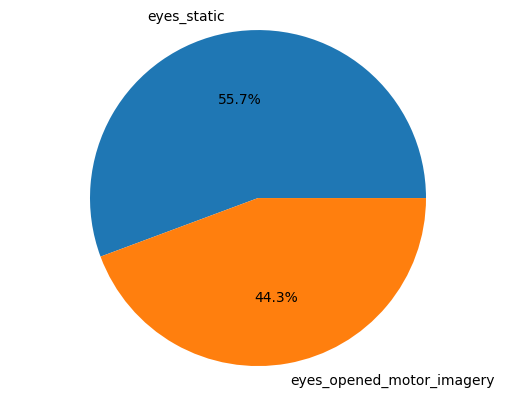

In [7]:
class_counts = df['class'].value_counts()

# Create pie chart
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [8]:
df.shape

(214643, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214643 entries, 11894 to 321825
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   channel_1  214643 non-null  float64
 1   channel_2  214643 non-null  float64
 2   channel_3  214643 non-null  float64
 3   channel_4  214643 non-null  float64
 4   class      214643 non-null  object 
dtypes: float64(4), object(1)
memory usage: 9.8+ MB


In [10]:
df.isnull().sum()

channel_1    0
channel_2    0
channel_3    0
channel_4    0
class        0
dtype: int64

In [11]:
df['class'].value_counts()

class
eyes_static                  119486
eyes_opened_motor_imagery     95157
Name: count, dtype: int64

In [8]:
eyes_static = df[df['class']=='eyes_static'].head(95157).copy()
eyes_opened_motor_imagery = df[df['class']=='eyes_opened_motor_imagery'].head(95157).copy()


In [9]:
balanced_data = pd.DataFrame()
balanced_data = pd.concat([balanced_data, eyes_opened_motor_imagery, eyes_static], ignore_index=True)
balanced_data.shape

(190314, 5)

In [10]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['class'])
balanced_data.head()

,channel_1,channel_2,channel_3,channel_4,class,label
0,-1025.366501,-589.965478,-1094.107732,-501.597252,eyes_opened_motor_imagery,0
1,-1018.062476,-581.580622,-1092.020868,-499.674943,eyes_opened_motor_imagery,0
2,-1024.315589,-590.597521,-1104.388717,-506.212289,eyes_opened_motor_imagery,0
3,-1005.750726,-588.447079,-1103.891310,-494.360546,eyes_opened_motor_imagery,0
4,-1009.845916,-588.349841,-1094.290987,-489.023708,eyes_opened_motor_imagery,0


In [11]:
X = balanced_data[['channel_1', 'channel_2', 'channel_3', 'channel_4']]
y = balanced_data['label']

In [13]:
X

,channel_1,channel_2,channel_3,channel_4
0,-1025.366501,-589.965478,-1094.107732,-501.597252
1,-1018.062476,-581.580622,-1092.020868,-499.674943
2,-1024.315589,-590.597521,-1104.388717,-506.212289
3,-1005.750726,-588.447079,-1103.891310,-494.360546
4,-1009.845916,-588.349841,-1094.290987,-489.023708
...,...,...,...,...
190309,-801.956097,17.487772,-578.280161,-12.156545
190310,-792.299676,30.334329,-569.955143,-17.283948
190311,-795.444931,11.242139,-594.997514,-34.756760
190312,-779.210026,-3.968034,-609.590603,-10.802701


### Standardized data

In [17]:
# # Todo : standardize after train test split
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# scaled_X = pd.DataFrame(data = X, columns = ['channel_1', 'channel_2', 'channel_3', 'channel_4'])
# scaled_X['label'] = y.values

# scaled_X

,channel_1,channel_2,channel_3,channel_4,label
0,-1.395937,-1.560658,-1.275400,-1.533250,0
1,-1.363410,-1.537233,-1.270710,-1.526287,0
2,-1.391257,-1.562424,-1.298505,-1.549968,0
3,-1.308581,-1.556416,-1.297388,-1.507035,0
4,-1.326819,-1.556145,-1.275812,-1.487703,0
...,...,...,...,...,...
190309,-0.401017,0.136461,-0.116146,0.239723,1
190310,-0.358014,0.172352,-0.097437,0.221149,1
190311,-0.372021,0.119012,-0.153716,0.157855,1
190312,-0.299721,0.076517,-0.186512,0.244627,1


### Frame preparation


In [12]:
import scipy.stats as stats

In [14]:
Fs = 200
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [15]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 4

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        channel_1 = df['channel_1'].values[i: i + frame_size]
        channel_2 = df['channel_2'].values[i: i + frame_size]
        channel_3 = df['channel_3'].values[i: i + frame_size]
        channel_4 = df['channel_4'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0]
        # print(label)
        frames.append([channel_1, channel_2, channel_3, channel_4])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [16]:
X['label'] = y.values
X

C:\Users\akash\AppData\Local\Temp\ipykernel_17288\696042435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['label'] = y.values


,channel_1,channel_2,channel_3,channel_4,label
0,-1025.366501,-589.965478,-1094.107732,-501.597252,0
1,-1018.062476,-581.580622,-1092.020868,-499.674943,0
2,-1024.315589,-590.597521,-1104.388717,-506.212289,0
3,-1005.750726,-588.447079,-1103.891310,-494.360546,0
4,-1009.845916,-588.349841,-1094.290987,-489.023708,0
...,...,...,...,...,...
190309,-801.956097,17.487772,-578.280161,-12.156545,1
190310,-792.299676,30.334329,-569.955143,-17.283948,1
190311,-795.444931,11.242139,-594.997514,-34.756760,1
190312,-779.210026,-3.968034,-609.590603,-10.802701,1


In [17]:
X, y = get_frames(X, frame_size, hop_size)

In [18]:
X.shape, y.shape

((474, 800, 4), (474,))

### Train test split

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27, stratify = y)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 800, 4), (95, 800, 4), (379,), (95,))

In [24]:
num_classes = len(np.unique(y_train))
print(num_classes)

2


In [26]:
# dont know what it does so try to remove this
# idx = np.random.permutation(len(x_train))
# x_train = x_train[idx]
# y_train = y_train[idx]
# print(idx)
# print(type(idx))
# print(idx.shape)

In [25]:
print(x_train.shape)
print(y_train.shape)

(379, 800, 4)
(379,)


In [26]:
print(keras.__version__)

2.15.0


## Build a model

We build a Fully Convolutional Neural Network originally proposed in
[this paper](https://arxiv.org/abs/1611.06455).
The implementation is based on the TF 2 version provided
[here](https://github.com/hfawaz/dl-4-tsc/).
The following hyperparameters (kernel_size, filters, the usage of BatchNorm) were found
via random search using [KerasTuner](https://github.com/keras-team/keras-tuner).

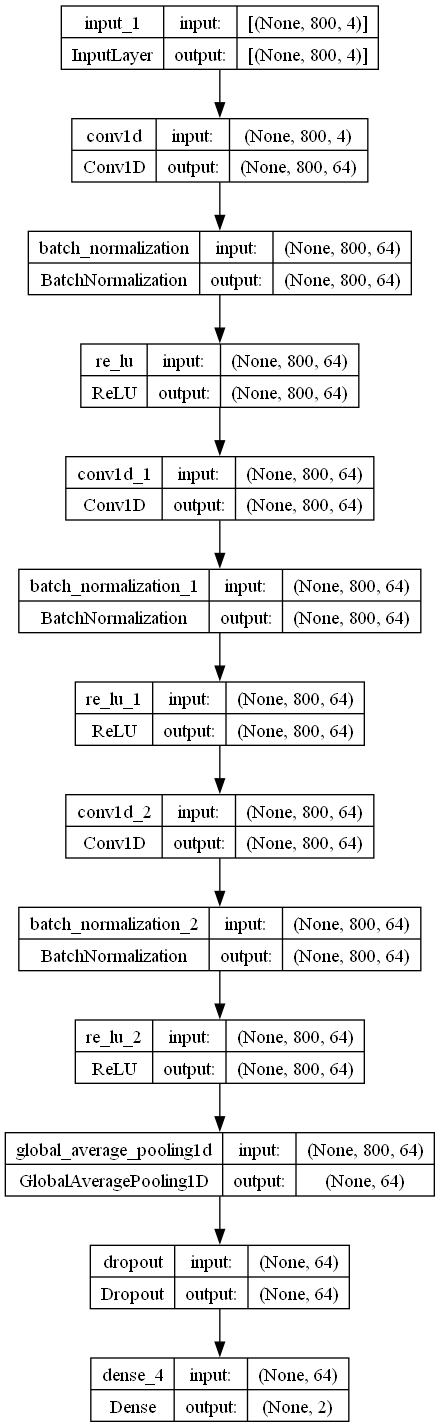

In [40]:

# def make_model(input_shape):
#     input_layer = keras.layers.Input(input_shape)

#     conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
#     conv1 = keras.layers.BatchNormalization()(conv1)
#     conv1 = keras.layers.ReLU()(conv1)

#     conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
#     conv2 = keras.layers.BatchNormalization()(conv2)
#     conv2 = keras.layers.ReLU()(conv2)

#     conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
#     conv3 = keras.layers.BatchNormalization()(conv3)
#     conv3 = keras.layers.ReLU()(conv3)

#     gap = keras.layers.GlobalAveragePooling1D()(conv3)
#     mlp_vector = keras.layers.Dropout(0.2)(gap)

#     output_layer = keras.layers.Dense(num_classes, activation="softmax")(mlp_vector)

#     return keras.models.Model(inputs=input_layer, outputs=output_layer)


# model = make_model(input_shape=x_train.shape[1:])
# keras.utils.plot_model(model, show_shapes=True)

### Model Architecture 2

In [27]:
# new model architecture
# Define the model
model = Sequential()

# Flatten the input data (assuming each sample is a 2D array of shape (800, 4))
model.add(Flatten(input_shape=(800, 4)))

# Add a dense layer with 64 units and relu activation
model.add(Dense(20, activation='relu',
            activity_regularizer=keras.regularizers.l1(0.00001)))

# Add output layer with 1 unit (assuming binary classification) and sigmoid activation
model.add(Dense(10, activation='relu',
            activity_regularizer=keras.regularizers.l1(0.00001)))

# Added praveen layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 20)                64020     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 64241 (250.94 KB)
Trainable params: 64241 (250.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Assuming x_train is your input data and y_train is your target labels
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10

10/10 [==============================] - 3s 87ms/step - loss: 122.0793 - accuracy: 0.7030 - val_loss: 0.2397 - val_accuracy: 0.9868
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 0.4114 - accuracy: 0.9934 - val_loss: 2.4594 - val_accuracy: 0.9868
Epoch 3/10
10/10 [==============================] - 0s 14ms/step - loss: 0.1612 - accuracy: 1.0000 - val_loss: 3.3749 - val_accuracy: 0.9868
Epoch 4/10
10/10 [==============================] - 0s 13ms/step - loss: 0.1674 - accuracy: 1.0000 - val_loss: 3.5892 - val_accuracy: 0.9868
Epoch 5/10
10/10 [==============================] - 0s 11ms/step - loss: 0.1694 - accuracy: 1.0000 - val_loss: 3.6679 - val_accuracy: 0.9868
Epoch 6/10
10/10 [==============================] - 0s 16ms/step - loss: 0.1699 - accuracy: 1.0000 - val_loss: 3.6941 - val_accuracy: 0.9868
Epoch 7/10
10/10 [==============================] - 0s 9ms/step - loss: 0.1697 - accuracy: 1.0000 - val_loss: 3.6999 - val_accuracy: 0.9868
Epoch 8/10
1

In [29]:
# Save the model
model.save("my_model.h5")

c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Train the model architecture 1

In [30]:
# epochs = 50
# batch_size = 32

# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         "best_model.keras", save_best_only=True, monitor="val_loss"
#     ),
#     keras.callbacks.ReduceLROnPlateau(
#         monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
#     ),
#     keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
# ]
# model.compile(
#     optimizer="adam",
#     loss="sparse_categorical_crossentropy",
#     metrics=["sparse_categorical_accuracy"],
# )
# history = model.fit(
#     x_train,
#     y_train,
#     batch_size=batch_size,
#     epochs=epochs,
#     callbacks=callbacks,
#     validation_split=0.2,
#     verbose=1,
# )

Epoch 1/50




InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main

  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 595, in run_forever

  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1881, in _run_once

  File "C:\Users\akash\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\ipykernel\kernelbase.py", line 542, in dispatch_queue

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\ipykernel\kernelbase.py", line 531, in process_one

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\ipykernel\kernelbase.py", line 775, in execute_request

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\akash\AppData\Local\Temp\ipykernel_6056\4009029205.py", line 18, in <module>

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\keras\src\losses.py", line 270, in call

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "c:\Users\akash\Downloads\projects\BCI_research\model\.venv\lib\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [25600,2] and labels shape [32]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1325]

## Evaluate model on test data

In [30]:
model = keras.models.load_model("my_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

3/3 [==============================] - 0s 5ms/step - loss: 0.1712 - accuracy: 1.0000
Test accuracy 1.0
Test loss 0.17116303741931915


## Plot the model's training and validation loss

In [46]:
# metric = "sparse_categorical_accuracy"
# plt.figure()
# plt.plot(history.history[metric])
# plt.plot(history.history["val_" + metric])
# plt.title("model " + metric)
# plt.ylabel(metric, fontsize="large")
# plt.xlabel("epoch", fontsize="large")
# plt.legend(["train", "val"], loc="best")
# plt.show()
# plt.close()

NameError: name 'history' is not defined

<Figure size 640x480 with 0 Axes>

We can see how the training accuracy reaches almost 0.95 after 100 epochs.
However, by observing the validation accuracy we can see how the network still needs
training until it reaches almost 0.97 for both the validation and the training accuracy
after 200 epochs. Beyond the 200th epoch, if we continue on training, the validation
accuracy will start decreasing while the training accuracy will continue on increasing:
the model starts overfitting.

### create ypred

In [31]:
y_train_pred = model.predict(x_train)
# print(x_test.shape)
# print(y_test.shape)


12/12 [==============================] - 0s 5ms/step


In [32]:
# prompt: how to predict time series data with keras model

ypred = model.predict(x_test)
print(x_test.shape)
print(y_test.shape)


3/3 [==============================] - 0s 11ms/step
(95, 800, 4)
(95,)


In [33]:
y_train_pred

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],

In [34]:
ypred

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],

### post proccessing for arch 2

In [37]:
y_train_pred = (y_train_pred > 0.5).astype(int)

In [38]:
y_train_pred.shape

(379, 10)

In [35]:
y_train_pred = y_train_pred[:, 0]  # Select the first column

In [36]:
y_train_pred.shape

(379,)

In [41]:
ypred = (ypred > 0.5).astype(int)

In [42]:
ypred.shape

(95, 10)

In [37]:
ypred = ypred[:, 0]  # Select the first column

In [38]:
ypred.shape

(95,)

### post processing for ypred for arch 1

In [70]:
# np.set_printoptions(linewidth=200)

In [71]:
# def convert_to_single_dimension(predictions):
#     # Get the index of the maximum probability for each prediction
#     max_indices = np.argmax(predictions, axis=1)

#     return max_indices

In [73]:
# ypred = convert_to_single_dimension(ypred)
# print(ypred)

[1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1]


In [74]:
# np.count_nonzero(ypred == 1)

48

In [76]:
# np.count_nonzero(y_test == 1)

48

### Confusion matrix

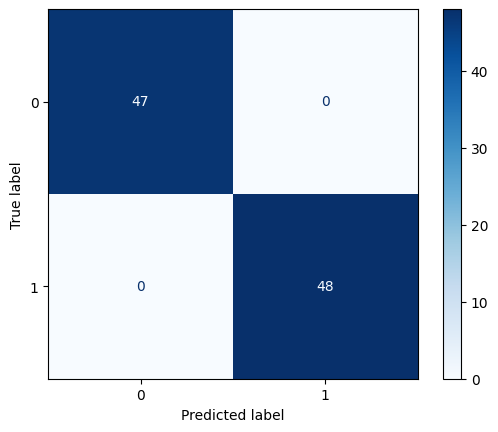

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["0","1"]

cm = confusion_matrix(y_test, ypred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

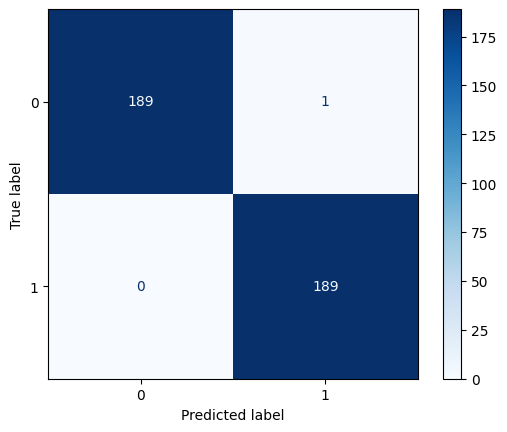

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["0","1"]

cm = confusion_matrix(y_train, y_train_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

### Classification report

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))
print('\n')
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        48

    accuracy                           1.00        95
   macro avg       1.00      1.00      1.00        95
weighted avg       1.00      1.00      1.00        95



              precision    recall  f1-score   support

           0       1.00      0.99      1.00       190
           1       0.99      1.00      1.00       189

    accuracy                           1.00       379
   macro avg       1.00      1.00      1.00       379
weighted avg       1.00      1.00      1.00       379

